## Greedy Problems and concepts

### Coinchanger

def coinchanger(cents, denominations=[1, 5, 10, 20]):
    
    coins = {d:0 for d in denominations}
    
    for c in sorted(coins.keys(), reverse=True):
        
        # Add the value for the current denomination c and decrement cents
        coins[c] += cents // c 
        cents = cents % c
        
        # No remaining cents? Return
        if not cents:
            total_coins = sum([i for i in coins.values()])
            return sorted(coins.items(), reverse=True), total_coins

In [3]:
coinchanger(250)

([(20, 12), (10, 1), (5, 0), (1, 0)], 13)

Pair wise distinct summands

In [9]:
def max_summands(num):
    summands = []
    sum_summands = 0
    next_int = 1

    while sum_summands + next_int <= num:
        sum_summands += next_int
        summands.append(next_int)
        next_int += 1

    summands[-1] += num - sum_summands
    return summands

In [10]:
max_summands(21)

[1, 2, 3, 4, 5, 6]

In [11]:
max_summands(8)

[1, 2, 5]

In [12]:
max_summands(7)

[1, 2, 4]

In [13]:
r = max_summands(100)
r, sum(r)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 22], 100)

## Knapsack Problem

What is knapsack problem about -> to fill as much weight/valuable in the bag/knapsack to return highest profit.

### 0 - 1 Knapsack problem and applications
It can be solved using greedy stratergy


In [21]:
values = [20,50,30,60]
weights = [10,20,15]
combine = zip(values, weights)
print(list(combine))

[(20, 10), (50, 20), (30, 15)]


In [24]:
my_list = ['apple', 'banana', 'orange']

for index, value in enumerate(my_list):
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: apple
Index: 1, Value: banana
Index: 2, Value: orange


In [25]:
def knapsack_01(capacity, weights, values):
    
    # data structures
    val_by_weight = [value / weight for value, weight in zip(values, weights)]
    sort_idx = [kv[0] for kv in sorted(enumerate(val_by_weight), key=lambda x:x[1], reverse=True)]
    knapsack = [0 for _ in values]
    total_weight, total_value = 0, 0

    # for every possible value/weight combination, starting with the heaviest item
    for i in sort_idx:
        print(i)
        
        # add the item, decrease knapsack weight capacity
        if total_weight + weights[i] <= capacity:
            knapsack[i] = 1
            total_weight += weights[i]
            total_value += values[i]
            
        # when we reach capacity, break out of the loop
        if total_weight == capacity:
            break

    return knapsack, total_weight, total_value

In [27]:
weights = [100,200,150,40]
values = [10,30,25,13]
capacity = 100
knapsack_01(capacity,weights,values)

3
2
1
0


([0, 0, 0, 1], 40, 13)

### Fractional knapsack problem

In [28]:
def knapsack_fract(capacity, weights, values):
    val_by_weight = [value / weight for value, weight in zip(values, weights)]
    sort_idx = [i for i,vbw in sorted(enumerate(val_by_weight), key=lambda x:x[1], reverse=True)]
    knapsack = [0 for _ in values]
    total_weight, total_value = 0, 0

    # in expensive order
    for i in sort_idx:   
        
        if total_weight + weights[i] <= capacity:
            # if we're under knapsack capacity by including the whole item, then add it
            knapsack[i] = 1
            total_weight += weights[i]
            total_value += values[i]
            
        else:
            # if we're over knapsack capacity by including the whole item, include the fractional item
            allowed = capacity - total_weight
            frac = allowed / weights[i]
            knapsack[i] = round(frac, 4)
            total_weight += allowed
            total_value += frac * values[i]  
            
        if total_weight == capacity:
            break

    return knapsack, total_weight, round(total_value, 4)

In [29]:
weights = [100,200,150,40]
values = [10,30,25,13]
capacity = 100
knapsack_fract(capacity,weights,values)

([0, 0, 0.4, 1], 100, 23.0)

### to count satiated students with a particular apetite ->
#### problem: 
You are given two lists, One representing the appetite of students at Rebecca's and the other is the total calorie of the dish.

You need to maximize the number of students that are satiated.

Each student can only eat one dish, and one dish is served to one student.

If the total calories of a dish is greater than or equal to the student's appetite, the student remains satiated.

Find the maximum number of students that can be satiated at Rebecca's, using a greedy strategy and not a brute-force implementation.


In [32]:
def satiated(students, calories):
    students.sort()
    calories.sort()
    c: int = 0
    count: int = 0
    print(students, calories)
    for i in students:
        if c < len(calories):
            if i <= calories[c]:
                count+=1
                c +=1
            else:
                while calories[c] < i:
                    c += 1
                count +=1
                c+=1
        else:
            break
    return count

In [33]:
students = [2001, 2005, 2500, 3000, 2750]
calories = [2002, 2756, 2999, 2400, 1500]
answer = satiated(students, calories)
print(answer)

[2001, 2005, 2500, 2750, 3000] [1500, 2002, 2400, 2756, 2999]
4


### Scheduling activities 

We always choose the activity whose start time is later than or equal to the current time, so that we can minimize the conflict of activities and participate in the most activities.

The greedy heuristic select only as much as possible chooses a locally optimal option and strives to achieve the overall optimal solution.


In [34]:
def most_activities(activities):
    activities.sort(key=lambda x: x[1])  # Sort activities by end time
    selected_activities = []
    current_time = 0
    
    for activity in activities:
        start_time, end_time = activity
        if start_time >= current_time:
            selected_activities.append(activity)
            current_time = end_time
    
    return selected_activities

In [35]:
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 9), (5, 9), (6, 10), (8, 11), (8, 12)]
r = most_activities(activities)
r

[(1, 4), (5, 7), (8, 11)]

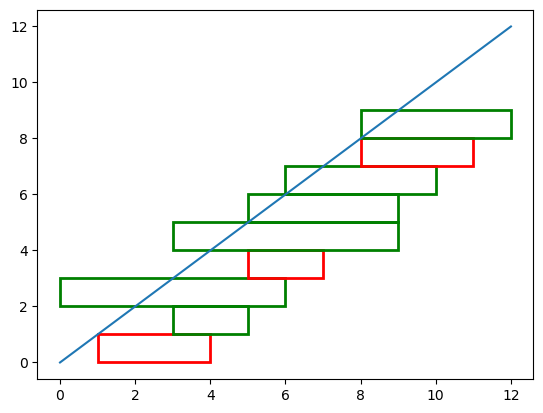

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot([0, 12],[0, 12])

#add rectangle to plot
for i,a in enumerate(activities):
    ax.add_patch(Rectangle((a[0], i), a[1]-a[0], 1, edgecolor = 'red' if a in r else 'green', lw=2, fill=False))